<a href="https://colab.research.google.com/github/mretana1999/Intro-to-Python/blob/main/assignment10/a10_mretanarodri2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COP 4045 - Python Programming - Dr. Marques - Summer 2021

---

## Student Name: Mauricio Retana Rodriguez Z#23484829


# Assignment 10: Introducing the Python Data Science stack
## STARTER 

### Goals 

- To acquire a basic understanding of the Python "data science stack" (NumPy, Pandas, Matplotlib, Scikit-Learn).
- To have an early experience of manipulating, summarizing, and visualizing small datasets. 
- To demonstrate the ability to write Python code to answer questions and test hypotheses based on the contents of those datasets.
- To learn how to implement several different machine learning classification models in Python 
- To learn how to test a model and produce a set of plots and performance measures

### Instructions

- This assignment is structured in two parts.
- For each part, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and the link to the "live" version of your solution on Google Colaboratory via Canvas.
- The number of points is indicated next to each part. They add up to 100.
- There are additional (10 points worth of) bonus items, which are, of course optional.

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 
- Remember: this is an early exercise in exploring datasets; learning the syntax and "tricks" of Python, Jupyter notebooks, Numpy, Pandas, and Matplotlib; and writing code to use data to test simple hypotheses, produce answers to simple questions, or make predictions.


---------
### Imports + Google Drive

In [ ]:
# Imports
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from __future__ import division
import seaborn as sns
sns.set(style='ticks', palette='Set2')
%matplotlib inline

In [ ]:
# OPTIONAL 
# Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

-------------------
## Part 1: EDA

The Python code below will load a dataset containing the salaries and demographic data of more than 1000 employees of a hypothetical company, available in the file *salaries.csv*, which is a simple comma-separated list of labels and values.

In [ ]:
#salaries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/salaries.csv') 
#salaries = pd.read_csv('./data/salaries.csv') 

from google.colab import files
uploaded = files.upload()
import io
salaries = pd.read_csv(io.StringIO(uploaded['salaries.csv'].decode('utf-8')))

Saving salaries.csv to salaries.csv


In [ ]:
print(salaries.shape)
print(salaries.count())

(1192, 6)
earn      1192
height    1192
sex       1192
ed        1192
age       1192
race      1192
dtype: int64


In [ ]:
salaries.head()

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white


In [ ]:
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


--------------------
### Summary statistics and correlations

Let's explore the dataset by plotting some graphs and displaying summary statistics. 

The code below should display:
- Min, max, average, and median salary (global)
- A histogram of salaries
- A scatterplot correlating salaries and years of education
- The (Pearson) correlation coefficient between the two variables.

This should help us get started.

In [ ]:
salary = np.array(salaries['earn'])
print("--- Salary statistics ---")
print("Minimum salary (global): ${:6.2f}".format(np.min(salary)))
print("Maximum salary (global): ${:6.2f}".format(np.max(salary)))
print("Average salary (global): ${:6.2f}".format(np.mean(salary)))
print("Median  salary (global): ${:6.2f}".format(np.median(salary)))

--- Salary statistics ---
Minimum salary (global): $200.00
Maximum salary (global): $200000.00
Average salary (global): $23154.77
Median  salary (global): $20000.00


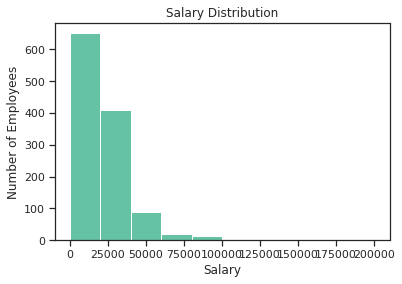

In [ ]:
plt.hist(salary)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees');

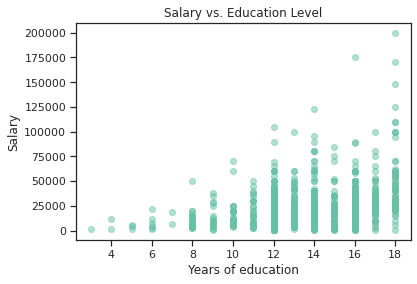

In [ ]:
years = np.array(salaries['ed'])
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Years of education');
plt.scatter(years, salary, alpha=0.5)
plt.show()

In [ ]:
# Compute Pearson coefficient
corr, _ = pearsonr(salary,years)
print('Correlation coefficient: ',corr)

Correlation coefficient:  0.3399765246894847


The [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) (a value between -1 and 1) can be used to summarize the strength of the linear relationship between two data samples.

A simplified way to interpret the result is (see table 1 [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/)):
- A value of 0 means no correlation
- Values below -0.5 or above 0.5 indicates a notable (negative/positive) correlation

### 1.1 Your turn! (10-14 points)

Write code to:

1. Display the total headcount and the number (and %) of male and female employees. (2 pts)
2. Compute and display the min, max, average, and median salary *per gender*. (8 pts)
3. (OPTIONAL) Plot meaningful graphs that could provide insight into the gender inequality (*if any is present*) associated with the salaries in the company. (<= 4 bonus points)


In [ ]:
# Enter your code here
salaries

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white
...,...,...,...,...,...,...
1187,19000.0,72.165733,male,12,29,white
1188,15000.0,61.135800,female,18,82,white
1189,8000.0,63.664164,female,12,33,white
1190,60000.0,71.925836,male,12,50,white


In [ ]:
salaries_female = salaries[salaries['sex'] == 'female']
salaries_male = salaries[salaries['sex'] == 'male']

In [ ]:
salaries_male

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
7,32000.0,72.698544,male,17,46,white
8,2000.0,72.039467,male,15,21,hispanic
9,27000.0,72.234933,male,12,26,white
10,6530.0,69.512146,male,16,65,white
...,...,...,...,...,...,...
1184,55000.0,68.995890,male,18,71,white
1185,58000.0,70.343370,male,18,53,white
1187,19000.0,72.165733,male,12,29,white
1190,60000.0,71.925836,male,12,50,white


In [ ]:
print(f"There is a total of {salaries.shape[0]} employees")
print(f"There are {salaries_male.shape[0]} male employees and {salaries_female.shape[0]} female employees")
print(f"So, males represent {salaries_male.shape[0]*100 / salaries.shape[0]:.2f}% and females represent {salaries_female.shape[0]*100 / salaries.shape[0]:.2f}% of the total population")

There is a total of 1192 employees
There are 505 male employees and 687 female employees
So, males represent 42.37% and females represent 57.63% of the total population


In [ ]:
salaries_male[['earn']].describe() #50% percentile is the same as the median

,earn
count,505.000000
mean,29786.130693
std,23297.816034
min,1000.000000
25%,16000.000000
50%,25000.000000
75%,36000.000000
max,200000.000000


In [ ]:
salaries_female[['earn']].describe()

,earn
count,687.000000
mean,18280.195051
std,14259.932378
min,200.000000
25%,9000.000000
50%,15000.000000
75%,25000.000000
max,123000.000000


In [ ]:
salary_female_np = salaries_female['earn'].to_numpy()
salary_male_np = salaries_male['earn'].to_numpy()

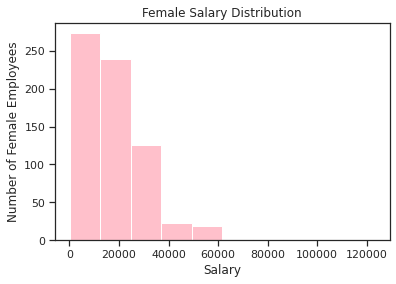

In [ ]:
plt.hist(salary_female_np,color='pink')
plt.title('Female Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Female Employees');

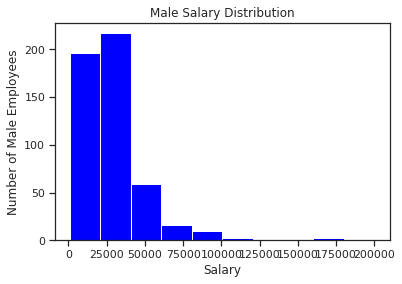

In [ ]:
plt.hist(salary_male_np,color='b')
plt.title('Male Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Male Employees');

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


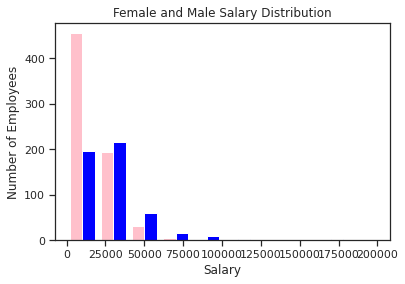

In [ ]:
plt.hist((salary_female_np,salary_male_np),color=['pink','b'])
plt.title('Female and Male Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

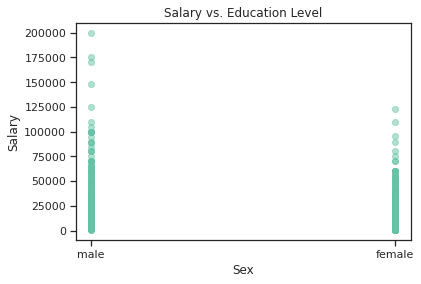

In [ ]:
sex = np.array(salaries['sex'])
sex_ticks = [0,1]
plt.xticks(sex_ticks,sex)
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Sex');
plt.scatter(sex,salary, alpha=0.5)
plt.show()

*Enter your text here*

--------------------
### Signs of inequality

As you can possibly tell by now, this dataset may help us test hypotheses and answer questions related to possible sources of inequality associated with the salary distribution: gender, age, race, etc.. 

Let's assume, for the sake of argument, that the number of years of education should correlate well with a person's salary (this is clearly a weak argument and the plot and Pearson correlation coefficient computation above suggests that this is *not* the case) and that other suspiciously high (positive or negative) correlations could be interpreted as a sign of inequality.

See Notebooks 1 and 2 from [my ICMLA 2019 tutorial with Christian Garbin](https://github.com/fau-masters-collected-works-cgarbin/ieee-icmla-2019-data-science-tutorial) for additional insights.

---------------------
### Hypotheses H1, H2, H3
At this point, we will formulate 3 different hypotheses that might suggest that the salary distribution is biased by factors such as age, gender, or race:

- H1: Older employees are paid less (i.e., ageism)
- H2: Female employees are paid less (i.e., gender bias)
- H3: Non-whites are paid less (i.e, race bias).

### 1.2 Your turn! (24-30 points)

Write Python code to test hypotheses H1, H2, and H3 (and some text to explain whether they were confirmed or not). 

Feel free to (also) use plots, but make your code independent of a human being interpreting those plots. 

**Weight**: 24 pts, i.e., 8 pts per hypothesis. 
Up to 6 bonus points for insightful additional hypotheses, code, and/or comments.  

H1:

In [ ]:
# Enter your code here
age = salaries['age']
salary = salaries['earn']
age.name = 'Age in Years'
salary.name = 'Salary Earned Annually'
age_np = age.to_numpy()
salary_np = salary.to_numpy()

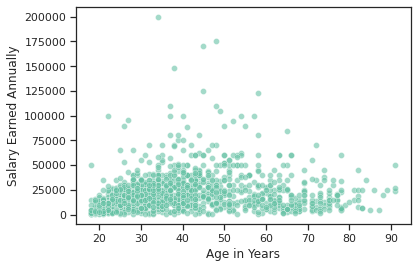

In [ ]:
sns.scatterplot(x=age,y=salary,alpha=0.6)

In [ ]:
# Compute Pearson coefficient
corr_age, _ = pearsonr(salary_np,age_np)
print('Correlation coefficient: ',corr_age)

Correlation coefficient:  0.08100297364190615


According to the scatterplot and correlation coefficient, there is no evident correlation between age and annual salary.

H2:

In [ ]:
# Enter your code here
salaries_sex_enc = salaries[['earn','sex']]
#salaries_sex_enc['sex'] = salaries['sex'].apply(lambda x: 0 if x == 'female' else 1)
salaries_sex_enc['sex'] = salaries_sex_enc['sex'].map(lambda x: 0 if x == 'female' else 1)
salaries_sex_enc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,earn,sex
0,50000.0,1
1,60000.0,0
2,30000.0,0
3,50000.0,0
4,51000.0,0
...,...,...
1187,19000.0,1
1188,15000.0,0
1189,8000.0,0
1190,60000.0,1


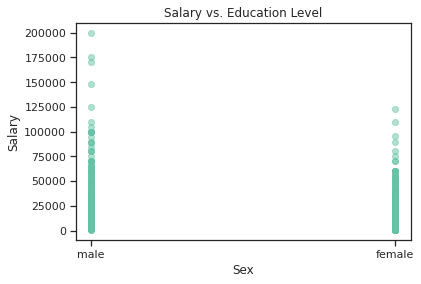

In [ ]:
sex = np.array(salaries['sex'])
sex_ticks = [0,1]
plt.xticks(sex_ticks,sex)
plt.title('Salary vs. Education Level')
plt.ylabel('Salary')
plt.xlabel('Sex');
plt.scatter(sex,salary, alpha=0.5)
plt.show()

In [ ]:
sex = salaries_sex_enc['sex']
sex_np = salaries_sex_enc['sex'].to_numpy()

corr_sex, _ = pearsonr(salary_np,sex_np)
print('Correlation coefficient: ',corr_sex)

Correlation coefficient:  0.2921021854657079


There seems to be a moderate correlation between salary and sex of employees. As seen from the graph, the highest paid salaries belong to male employees. However, besides those outliers, most men also fall in the salary range of women.

H3:

In [ ]:
salaries['race'].unique()

array(['white', 'other', 'hispanic', 'black'], dtype=object)

In [ ]:
race = salaries['race'].map({'white':0,'black':1,'hispanic':2,'other':3})
race

0       0
1       0
2       0
3       3
4       0
       ..
1187    0
1188    0
1189    0
1190    0
1191    0
Name: race, Length: 1192, dtype: int64

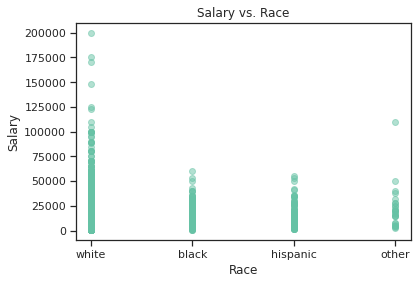

In [ ]:
race_np = np.array(race)
race_ticks = [0,1,2,3]
plt.xticks(race_ticks,['white','black','hispanic','other'])
plt.title('Salary vs. Race')
plt.ylabel('Salary')
plt.xlabel('Race');
plt.scatter(race_np,salary, alpha=0.5)
plt.show()

In [ ]:
corr_race, _ = pearsonr(salary,race_np)
print('Correlation coefficient: ',corr_race)

Correlation coefficient:  -0.06850868365087137


-------------------
## Part 2: Classification

### 2a. Iris flower classification

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Histograms, pair plots and summary statistics 

The code below:

1. Computes and displays relevant summary statistics for the whole dataset.
2. Displays the pair plots for all (4) attributes for all (3) categories / species / classes in the Iris dataset. 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


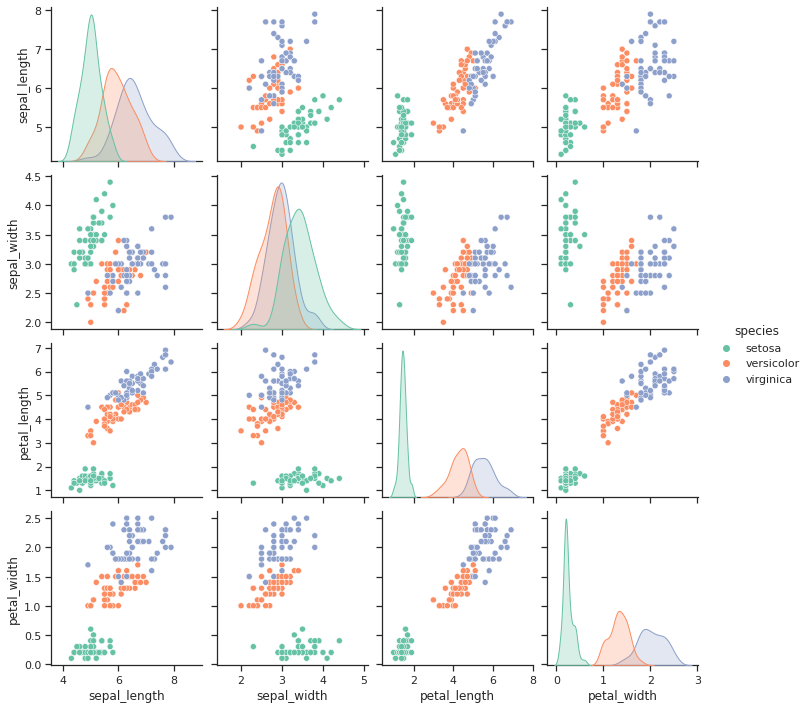

In [ ]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Display summary statistics for the whole dataset
iris.describe()

#### 2.1 Your turn! (25 points)
Write code to: 

1. Build a decision tree classifier using scikit-learn's `DecisionTreeClassifier` (using the default options). Check documentation at https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html 
2. Plot the resulting decision tree. 
(Note: if `graphviz` gives you headaches, a text-based 'plot'-- using `export_text` -- should be OK.)
3. Perform k-fold cross-validation using k=3 and display the results. 


In [ ]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
iris['species_encod'] = iris['species'].apply(lambda x: 0 if x == 'setosa' else 1 if x == 'versicolor' else 2)
iris['species_encod'].unique()

array([0, 1, 2])

In [ ]:
y = iris[['species_encod']] # target attributes 
X = iris.iloc[:, 0:4] # input attributes
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y.head()

,species_encod
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns = ['sepal_length','sepal_width','petal_length','petal_width'])
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
import random
from sklearn.model_selection import train_test_split
random.seed(42) # for reproducibility purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)

np.shape(y_train)

(105, 1)

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [ ]:
clf.predict(X_test.iloc[0:10])

array([2, 2, 0, 0, 1, 0, 1, 2, 0, 1])

In [ ]:
y_test[0:10]

,species_encod
136,2
142,2
39,0
44,0
50,1
23,0
90,1
149,2
46,0
55,1


In [ ]:
clf.score(X_test, y_test)

0.9777777777777777

[Text(334.8, 587.0880000000001, 'petal_width <= 0.292\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(283.2923076923077, 456.624, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(386.3076923076923, 456.624, 'petal_width <= 0.688\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(206.03076923076924, 326.1600000000001, 'petal_length <= 0.669\ngini = 0.149\nsamples = 37\nvalue = [0, 34, 3]\nclass = versicolor'),
 Text(103.01538461538462, 195.69600000000003, 'petal_width <= 0.646\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(51.50769230769231, 65.23200000000008, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(154.52307692307693, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(309.04615384615386, 195.69600000000003, 'petal_width <= 0.604\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(257.5384

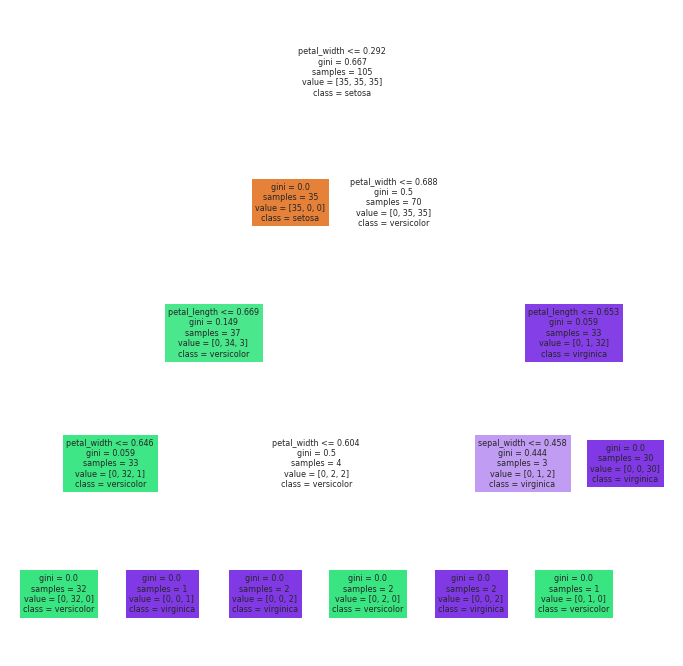

In [ ]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf,feature_names=X.columns, class_names=iris['species'].unique(),filled=True, fontsize=8)

### 2b. Digit classification

The MNIST handwritten digit dataset consists of a training set of 60,000 examples, and a test set of 10,000 examples. Each image in the dataset has 28$\times$28 pixels. 

The Python code below loads the images from the MNIST dataset, flattens them, normalizes them (i.e., maps the intensity values from [0..255] to [0..1]), and displays a few images from the training set.

In [ ]:
from keras.datasets import mnist

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and validation sets
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

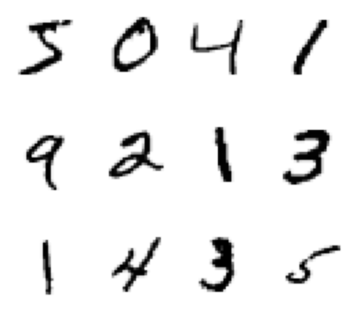

In [ ]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
X_valid.shape

(10000, 28, 28)

In [ ]:
y_valid.shape

(10000,)

In [ ]:
y_valid[0]

7

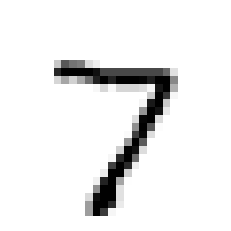

In [ ]:
plt.imshow(X_valid[0], cmap='Greys')
plt.axis('off')
plt.show()

In [ ]:
# Reshape (flatten) images 
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_valid_reshaped = X_valid.reshape(10000, 784).astype('float32')

# Scale images to the [0, 1] range
X_train_scaled_reshaped = X_train_reshaped / 255
X_valid_scaled_reshaped = X_valid_reshaped / 255

# Renaming for conciseness
X_training = X_train_scaled_reshaped
X_validation = X_valid_scaled_reshaped

print("X_training shape (after reshaping + scaling):", X_training.shape)
print(X_training.shape[0], "train samples")
print("X_validation shape (after reshaping + scaling):", X_validation.shape)
print(X_validation.shape[0], "validation samples")

X_training shape (after reshaping + scaling): (60000, 784)
60000 train samples
X_validation shape (after reshaping + scaling): (10000, 784)
10000 validation samples


In [ ]:
import tensorflow as tf
# convert class vectors to binary class matrices
y_training = tf.keras.utils.to_categorical(y_train, num_classes)
y_validation = tf.keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
print(y_valid[0])
print(y_validation[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#### A baseline classifier

The code below is an example of how to:

1. Build and fit a 10-class Naive Bayes classifier using scikit-learn's `MultinomialNB()` with default options and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy, and plot the resulting confusing matrix.


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_training, y_train)
pred_labels = model.predict(X_validation)

In [ ]:
pred_labels.shape

(10000,)

In [ ]:
print(pred_labels)

[7 2 1 ... 9 8 6]


In [ ]:
print(y_valid)

[7 2 1 ... 4 5 6]


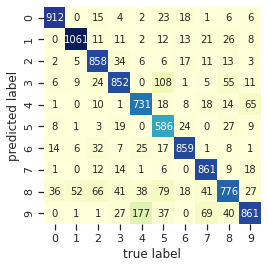

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 
mat = confusion_matrix(y_valid, pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, pred_labels)

0.8357

#### 2.2 Your turn! (20 points)

Write code to: 

1. Build and fit a 10-class Random Forests classifier using scikit-learn's `RandomForestClassifier()` with default options (don't forget `random_state=0`) and using the raw pixel values as features. 
2. Make predictions on the test data, compute the overall accuracy and plot the resulting confusing matrix. 

Hint: your accuracy should be > 90%

In [ ]:
# ENTER YOUR CODE HERE
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_training.shape

(60000, 784)

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_training,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
pred_val_labels = rf.predict(X_validation)
print(pred_val_labels)
print(y_valid)
rf.score(X_validation,y_valid) #score for validation accuracy

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


0.9693

[[ 970    0    0    0    0    3    2    1    3    1]
 [   0 1124    2    2    1    1    3    0    2    0]
 [   5    0 1002    5    2    0    3    7    7    1]
 [   0    0    9  973    0    6    0   10   10    2]
 [   1    0    2    0  955    0    4    0    2   18]
 [   2    0    0   16    2  855    7    1    6    3]
 [   7    3    0    0    4    8  932    0    4    0]
 [   2    3   19    1    1    0    0  991    1   10]
 [   4    0    6    6    4    5    4    5  931    9]
 [   6    5    3   12   11    0    1    3    8  960]]


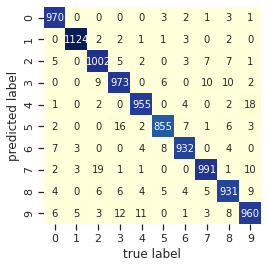

In [ ]:
conf_mat = confusion_matrix(y_valid,pred_val_labels)
print(conf_mat)
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False, cmap="YlGnBu")
plt.xlabel('true label')
plt.ylabel('predicted label');

## Conclusions (21 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?

From this assignment I have learned the basics of data analysis. This includes preprocessing data which was in my opinion the most important part of this assignment. I have also learned more about some of the most popular data science libraries such as Pandas, Numpy and ScikitLearn as well as plotting libraries such as Matplotlib and Seaborn. I have learned more about manipulating data using Pandas dataframes and converting them to Numpy arrays to obtain more information from the data and to be able to plot that information in representative ways that allow me to better analyze the data.

- Which parts were the most fun, time-consuming, enlightening, tedious?

The fun part was using ScikitLearn to create machine learning models that classify the data based on attributes and labels using the pre-programmed models from this library. The time-consuming part was reading documentation on how to implement these models. Another time-consuming and tedious task was learning the basic of Pandas to be able to understand the starter code as well as how to manipulate the data to create new plots.

- What would you do if you had an additional week to work on this?

I would look for more types of plots that give additional insight into the data from the salary csv file.